<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/IRC001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/main/data_for_tree.xlsx

--2024-09-11 18:10:36--  https://raw.githubusercontent.com/wannasmile/colab_code_note/main/data_for_tree.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8881601 (8.5M) [application/octet-stream]
Saving to: ‘data_for_tree.xlsx.4’

data_for_tree.xlsx. 100%[===================>]   8.47M  --.-KB/s    in 0.04s   

2024-09-11 18:10:36 (215 MB/s) - ‘data_for_tree.xlsx.4’ saved [8881601/8881601]



In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
data = pd.read_excel('data_for_tree.xlsx', nrows=80000)
#data = pd.read_excel('data_for_tree.xlsx')
data.head()

,uid,oil_actv_dt,create_dt,total_oil_cnt,pay_amount_total,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-19,2018-08-17,275.0,48295495.4,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-19,2018-08-16,275.0,48295495.4,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-19,2018-08-15,275.0,48295495.4,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-19,2018-08-14,275.0,48295495.4,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-19,2018-08-13,275.0,48295495.4,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3


In [4]:
org_lst = ['uid','create_dt','oil_actv_dt','class_new','bad_ind']
agg_lst = ['oil_amount','discount_amount','sale_amount','amount','pay_amount','coupon_amount','payment_coupon_amount']
dstc_lst = ['channel_code','oil_code','scene','source_app','call_source']

df = data[org_lst].copy()
df[agg_lst] = data[agg_lst].copy()
df[dstc_lst] = data[dstc_lst].copy()

base = df[org_lst].copy()
base = base.drop_duplicates(['uid'],keep='first')

In [5]:
df.head(10)

,uid,create_dt,oil_actv_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-17,2018-08-19,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-16,2018-08-19,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-15,2018-08-19,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-14,2018-08-19,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-13,2018-08-19,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3
5,A8217710,2018-08-12,2018-08-19,B,0,2135.72,1115045.0,1137801.0,1097045.0,5485221.0,1.0,1.0,1,2,2,0,3
6,A8217710,2018-08-11,2018-08-19,B,0,1894.18,979609.0,999601.0,963609.0,4818041.0,1.0,1.0,1,2,2,0,3
7,A8217710,2018-08-09,2018-08-19,B,0,4795.80,2528009.0,2579601.0,2486009.0,12430041.0,1.0,1.0,1,3,2,0,3
8,A8217710,2018-08-07,2018-08-19,B,0,4883.58,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,3,2,0,3
9,A8217710,2018-08-06,2018-08-19,B,0,3475.14,1763609.0,1799601.0,1734609.0,8673041.0,1.0,1.0,1,2,2,0,3


In [6]:
gn = pd.DataFrame()
for i in agg_lst:
    #计算个数
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:len(df[i])).reset_index())
    tp.columns = ['uid',i + '_cnt']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #求历史特征值大于零的个数
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.where(df[i]>0,1,0).sum()).reset_index())
    tp.columns = ['uid',i + '_num']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求和
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nansum(df[i])).reset_index())
    tp.columns = ['uid',i + '_tot']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求均值
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmean(df[i])).reset_index())
    tp.columns = ['uid',i + '_avg']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求最大值
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmax(df[i])).reset_index())
    tp.columns = ['uid',i + '_max']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求最小值
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmin(df[i])).reset_index())
    tp.columns = ['uid',i + '_min']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求方差
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanvar(df[i])).reset_index())
    tp.columns = ['uid',i + '_var']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求极差
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmax(df[i])-np.nanmin(df[i])).reset_index())
    tp.columns = ['uid',i + '_ran']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求变异系数（为防止除数为0，利用0.01进行平滑）
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmean(df[i])/(np.nanvar(df[i])+0.01))).reset_index()
    tp.columns = ['uid',i + '_cva']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')


gn.head(10)

<ipython-input-6-106d27f77801>:29: RuntimeWarning: Mean of empty slice
  lambda df:np.nanmean(df[i])).reset_index())
<ipython-input-6-106d27f77801>:37: RuntimeWarning: All-NaN axis encountered
  lambda df:np.nanmax(df[i])).reset_index())
<ipython-input-6-106d27f77801>:45: RuntimeWarning: All-NaN axis encountered
  lambda df:np.nanmin(df[i])).reset_index())
<ipython-input-6-106d27f77801>:53: RuntimeWarning: Degrees of freedom <= 0 for slice.
  lambda df:np.nanvar(df[i])).reset_index())
<ipython-input-6-106d27f77801>:61: RuntimeWarning: All-NaN axis encountered
  lambda df:np.nanmax(df[i])-np.nanmin(df[i])).reset_index())
<ipython-input-6-106d27f77801>:69: RuntimeWarning: Mean of empty slice
  lambda df:np.nanmean(df[i])/(np.nanvar(df[i])+0.01))).reset_index()
<ipython-input-6-106d27f77801>:69: RuntimeWarning: Degrees of freedom <= 0 for slice.
  lambda df:np.nanmean(df[i])/(np.nanvar(df[i])+0.01))).reset_index()
<ipython-input-6-106d27f77801>:29: RuntimeWarning: Mean of empty slice
  la

,uid,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,oil_amount_max,oil_amount_min,oil_amount_var,oil_amount_ran,oil_amount_cva,...,coupon_amount_cva,payment_coupon_amount_cnt,payment_coupon_amount_num,payment_coupon_amount_tot,payment_coupon_amount_avg,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_ran,payment_coupon_amount_cva
0,A10000481,1,1,190.52,190.520000,190.52,190.52,0.000000,0.00,19052.000000,...,0.0,1,1,200.0,200.000000,200.0,200.0,0.000000,0.0,20000.000000
1,A1000232,3,3,748.64,249.546667,277.92,220.10,557.768089,57.82,0.447394,...,0.0,3,2,300.0,100.000000,200.0,0.0,6666.666667,200.0,0.015000
2,A1000455,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,A10006069,7,7,1108.46,158.351429,239.78,117.34,1431.817927,122.44,0.110594,...,0.0,7,7,1300.0,185.714286,300.0,100.0,6938.775510,200.0,0.026765
4,A10010042,15,15,1499.10,99.940000,153.94,64.24,437.167200,89.70,0.228603,...,0.0,15,12,1900.0,126.666667,500.0,0.0,13955.555556,500.0,0.009076
5,A1001014,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,A1001592,22,22,10495.58,477.071818,667.68,271.94,12350.315042,395.74,0.038628,...,100.0,22,22,22.0,1.000000,1.0,1.0,0.000000,0.0,100.000000
7,A10015929,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,A10017144,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,A10017912,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gc = pd.DataFrame()

"""
离散值处理
"""
for i in dstc_lst:
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df: len(set(df[i]))).reset_index())
    tp.columns = ['uid',i + '_dstc']
    if gc.empty == True:
        gc = tp
    else:
        gc = pd.merge(gc,tp,on = 'uid',how = 'left')

fn = base.merge(gn,on='uid').merge(gc,on='uid')
fn = pd.merge(fn,gc,on='uid')
fn.shape

(11307, 78)

In [8]:
fn.head(10)

,uid,create_dt,oil_actv_dt,class_new,bad_ind,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,oil_amount_max,...,channel_code_dstc_x,oil_code_dstc_x,scene_dstc_x,source_app_dstc_x,call_source_dstc_x,channel_code_dstc_y,oil_code_dstc_y,scene_dstc_y,source_app_dstc_y,call_source_dstc_y
0,A8217710,2018-08-17,2018-08-19,B,0,137,137,492617.96,3595.751533,7952.82,...,1,3,1,1,1,1,3,1,1,1
1,A7261706,2018-08-01,2018-08-03,B,0,243,243,145830.84,600.126914,1481.00,...,1,2,3,1,1,1,2,3,1,1
2,A10920578,2018-08-31,2018-09-05,E,0,59,59,100928.26,1710.648475,6127.14,...,1,1,1,1,1,1,1,1,1,1
3,A1389291,2018-07-28,2018-08-01,C,0,48,48,67548.92,1407.269167,3119.02,...,1,1,1,1,2,1,1,1,1,2
4,A4260408,2018-09-02,2018-09-29,B,0,69,69,65624.72,951.082899,1963.42,...,1,1,2,1,1,1,1,2,1,1
5,A5249423,2018-10-24,2018-10-25,B,0,104,104,74018.86,711.719808,1510.32,...,1,1,1,1,1,1,1,1,1,1
6,A11545953,2018-08-24,2018-08-25,A,0,40,40,58138.56,1453.464000,3497.06,...,1,1,1,1,1,1,1,1,1,1
7,A3442915,2018-03-13,2018-05-22,D,0,43,43,57531.68,1337.946047,2478.06,...,1,1,2,1,2,1,1,2,1,2
8,A105347,2018-08-15,2018-09-23,B,0,63,63,54234.40,860.863492,1240.32,...,1,1,2,1,2,1,1,2,1,2
9,A1679426,2018-08-24,2018-08-27,B,0,64,64,49994.04,781.156875,2021.14,...,1,1,1,1,1,1,1,1,1,1


In [9]:
x = fn.drop(['uid','oil_actv_dt','create_dt','bad_ind','class_new'],axis = 1)
y = fn.bad_ind.copy()

In [10]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(max_depth = 2,min_samples_leaf = 500,min_samples_split = 5000)
dtree = dtree.fit(x,y)

In [11]:
import pydotplus
from IPython.display import Image
#from sklearn.externals.six import StringIO
from six import StringIO
import os

In [12]:
dot_data = StringIO()
tree.export_graphviz(dtree,
                     out_file=dot_data,
                     feature_names=x.columns,
                     class_names=['bad_ind'],
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_pdf("tree.pdf")

True

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


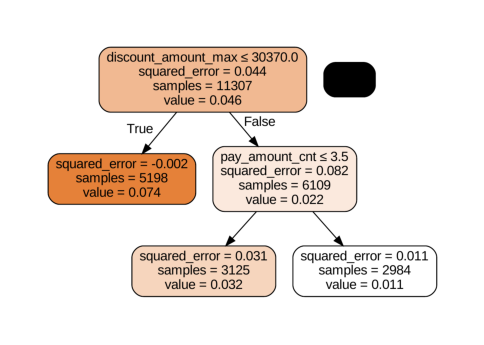

In [13]:
!pip install pdf2image
!apt-get install poppler-utils

from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# 将PDF文件转换为图像
images = convert_from_path('tree.pdf')

# 在Colab中显示图像
for i, image in enumerate(images):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [14]:
dff1 = fn.loc[(fn.discount_amount_max>30370.0)&(fn.pay_amount_cnt>3.5)].copy()
dff1['level'] = 'past_A'
dff2 = fn.loc[(fn.discount_amount_max>30370.0)&(fn.pay_amount_cnt<=3.5)].copy()
dff2['level'] = 'past_B'
dff3 = fn.loc[fn.discount_amount_max<=30370.0].copy()
dff3['level'] = 'past_C'